In [30]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA


# Carregar os dados
url = 'https://raw.githubusercontent.com/jdlmauricio/techalleg_fase_2/refs/heads/main/Dados%20Hist%C3%B3ricos%20-%20Ibovespa.csv'
indice_ibov = pd.read_csv(url, parse_dates=[0], index_col='Data')

datas_completas = pd.date_range(start=indice_ibov.index.min(), end=indice_ibov.index.max(), freq= 'D')
indice_ibov = indice_ibov.reindex(datas_completas)
indice_ibov.index.name = 'Data'

# Visualizar os primeiros registros
indice_ibov.head()


C:\Users\jdlma\AppData\Local\Temp\ipykernel_23560\3454256760.py:19: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  indice_ibov = pd.read_csv(url, parse_dates=[0], index_col='Data')


,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2005-01-03,25.722,26.193,26.492,25.671,"115,64M","-1,81%"
2005-01-04,24.848,25.722,25.873,24.791,"146,14M","-3,40%"
2005-01-05,24.692,24.859,25.001,24.523,"127,42M","-0,63%"
2005-01-06,24.367,24.695,24.808,24.250,"151,17M","-1,32%"
2005-01-07,24.747,24.376,24.874,24.376,"104,96M","1,56%"


In [32]:
indice_ibov = indice_ibov.fillna(method='ffill')

C:\Users\jdlma\AppData\Local\Temp\ipykernel_23560\2523758291.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  indice_ibov = indice_ibov.fillna(method='ffill')


In [33]:
indice_ibov.head(30)


,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2005-01-03,25.722,26.193,26.492,25.671,"115,64M","-1,81%"
2005-01-04,24.848,25.722,25.873,24.791,"146,14M","-3,40%"
2005-01-05,24.692,24.859,25.001,24.523,"127,42M","-0,63%"
2005-01-06,24.367,24.695,24.808,24.250,"151,17M","-1,32%"
2005-01-07,24.747,24.376,24.874,24.376,"104,96M","1,56%"
2005-01-08,24.747,24.376,24.874,24.376,"104,96M","1,56%"
2005-01-09,24.747,24.376,24.874,24.376,"104,96M","1,56%"
2005-01-10,24.292,24.747,24.825,24.086,"126,23M","-1,84%"
2005-01-11,24.370,24.295,24.457,24.127,"111,40M","0,32%"


In [34]:
indice_ibov['Vol.'] = indice_ibov['Vol.'].str.replace(',', '', regex=False)
indice_ibov['Vol.'] = indice_ibov['Vol.'].str.replace('M', '0000', regex=False)
indice_ibov['Vol.'] = indice_ibov['Vol.'].str.replace('K', '', regex=False)
indice_ibov['Var%'] = indice_ibov['Var%'].str.replace('%', '', regex=False)
indice_ibov['Var%'] = indice_ibov['Var%'].str.replace(',', '.', regex=False)


# Verificando os primeiros valores para verificação
indice_ibov.tail()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2024-12-26,121.078,120.767,121.612,120.428,8340000,0.26
2024-12-27,120.269,121.078,121.609,120.252,8940000,-0.67
2024-12-28,120.269,121.078,121.609,120.252,8940000,-0.67
2024-12-29,120.269,121.078,121.609,120.252,8940000,-0.67
2024-12-30,120.283,120.267,121.050,120.158,8900000,0.01


In [35]:
df_novo = indice_ibov
df_novo = df_novo.reset_index()
df_novo['unique_id'] = 0
df_pf = df_novo[['unique_id','Data', 'Abertura', 'Último', 'Máxima', 'Mínima', 'Vol.', 'Var%' ]]
df_novo = df_novo[['unique_id','Data','Abertura', 'Último', 'Máxima', 'Mínima', 'Vol.', 'Var%' ]]




In [36]:
df_pf.rename({"Último": "fechamento"}, inplace=True, axis=1)
df_pf.rename({"Abertura": "abertura"}, inplace=True, axis=1)
df_pf.rename({"Máxima": "alta"}, inplace=True, axis=1)
df_pf.rename({"Mínima": "baixa"}, inplace=True, axis=1)
df_pf.rename({"Vol.": "vol"}, inplace=True, axis=1)
df_pf.rename({"Var%": "var%"}, inplace=True, axis=1)

###propet

In [37]:
df_pf.head()

,unique_id,Data,abertura,fechamento,alta,baixa,vol,var%
0,0,2005-01-03,26.193,25.722,26.492,25.671,115640000,-1.81
1,0,2005-01-04,25.722,24.848,25.873,24.791,146140000,-3.40
2,0,2005-01-05,24.859,24.692,25.001,24.523,127420000,-0.63
3,0,2005-01-06,24.695,24.367,24.808,24.250,151170000,-1.32
4,0,2005-01-07,24.376,24.747,24.874,24.376,104960000,1.56


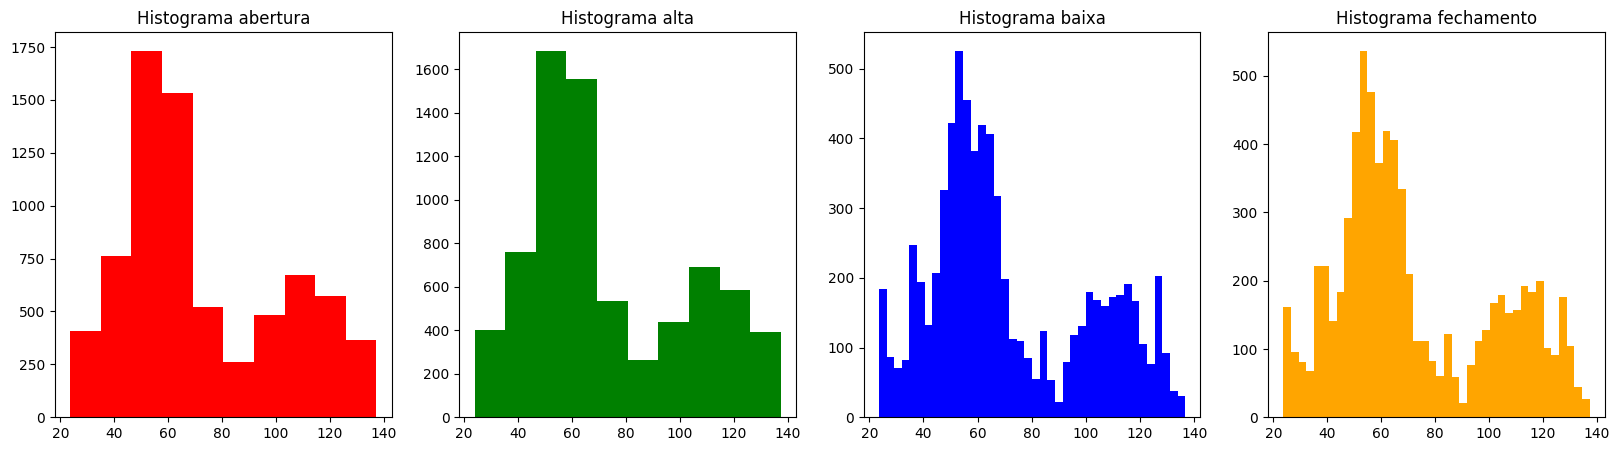

In [38]:
#new_fig = plt.figure(figsize=(18,8))
new_fig = plt.figure(figsize=(20,5))

#((5,4), (0,0))
ax1 = plt.subplot2grid((1,4), (0,0))
ax2 = plt.subplot2grid((1,4), (0,1))
ax3 = plt.subplot2grid((1,4), (0,2))
ax4 = plt.subplot2grid((1,4), (0,3))

ax1.hist(df_pf['abertura'], color='red',bins=10)
ax2.hist(df_pf['alta'], color='green',bins=10)
ax3.hist(df_pf['baixa'], color='blue',bins=40);
ax4.hist(df_pf['fechamento'], color='orange',bins=40)

ax1.set_title('Histograma abertura')
ax2.set_title('Histograma alta')
ax3.set_title('Histograma baixa')
ax4.set_title('Histograma fechamento')

plt.show()

In [39]:
historico = df_pf.copy()

def rolling_column_std( df, column_name, days,exclude=True ):
    column_name_hist = "std_%s_%sd" % (column_name, days)
    df[column_name_hist] = df[column_name].rolling(days).std().round(2)
    if exclude:
        df.drop([column_name], axis='columns', inplace=True)

rolling_column_std(historico,'abertura', 5, False)
rolling_column_std(historico,'fechamento', 5, False)
rolling_column_std(historico,'vol', 5, False)
rolling_column_std(historico,'alta', 5, False)
rolling_column_std(historico,'baixa', 5, False)

rolling_column_std(historico,'abertura', 10, False)
rolling_column_std(historico,'fechamento', 10, False)
rolling_column_std(historico,'vol', 10, False)
rolling_column_std(historico,'alta', 10, False)
rolling_column_std(historico,'baixa', 10,  False)



historico

,unique_id,Data,abertura,fechamento,alta,baixa,vol,var%,std_abertura_5d,std_fechamento_5d,std_vol_5d,std_alta_5d,std_baixa_5d,std_abertura_10d,std_fechamento_10d,std_vol_10d,std_alta_10d,std_baixa_10d
0,0,2005-01-03,26.193,25.722,26.492,25.671,115640000,-1.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,2005-01-04,25.722,24.848,25.873,24.791,146140000,-3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,2005-01-05,24.859,24.692,25.001,24.523,127420000,-0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2005-01-06,24.695,24.367,24.808,24.250,151170000,-1.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,2005-01-07,24.376,24.747,24.874,24.376,104960000,1.56,0.76,0.51,19647991.75,0.74,0.57,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7297,0,2024-12-26,120.767,121.078,121.612,120.428,8340000,0.26,0.64,0.58,3901010.13,0.24,0.10,1.28,1.23,4433083.20,1.27,0.94
7298,0,2024-12-27,121.078,120.269,121.609,120.252,8940000,-0.67,0.66,0.29,748217.88,0.27,0.16,1.17,0.67,4576595.53,0.89,0.16
7299,0,2024-12-28,121.078,120.269,121.609,120.252,8940000,-0.67,0.63,0.35,706562.10,0.27,0.18,0.54,0.72,4197478.61,0.27,0.19
7300,0,2024-12-29,121.078,120.269,121.609,120.252,8940000,-0.67,0.51,0.37,580189.62,0.22,0.16,0.51,0.77,4304888.69,0.29,0.20


In [40]:
historico.isnull().sum()

unique_id             0
Data                  0
abertura              0
fechamento            0
alta                  0
baixa                 0
vol                   0
var%                  0
std_abertura_5d       4
std_fechamento_5d     4
std_vol_5d            4
std_alta_5d           4
std_baixa_5d          4
std_abertura_10d      9
std_fechamento_10d    9
std_vol_10d           9
std_alta_10d          9
std_baixa_10d         9
dtype: int64

In [41]:
historico.dropna(subset=['std_abertura_5d'], inplace=True)
historico.dropna(subset=['std_abertura_10d'], inplace=True)
historico.dropna(subset=['std_fechamento_5d'], inplace=True)
historico.dropna(subset=['std_fechamento_10d'], inplace=True)
historico.isnull().sum()

unique_id             0
Data                  0
abertura              0
fechamento            0
alta                  0
baixa                 0
vol                   0
var%                  0
std_abertura_5d       0
std_fechamento_5d     0
std_vol_5d            0
std_alta_5d           0
std_baixa_5d          0
std_abertura_10d      0
std_fechamento_10d    0
std_vol_10d           0
std_alta_10d          0
std_baixa_10d         0
dtype: int64

In [42]:
from prophet import Prophet

historico_goog = historico.reset_index()
#historico['date'] = pd.to_datetime(historico['date'])
#historico.sort_values(by=['symbol','date'], inplace = True)


historico_goog.rename({"Data": "ds"}, inplace=True, axis=1)
historico_goog.rename({"fechamento": "y"}, inplace=True, axis=1)

print(historico_goog)

      index  unique_id         ds  abertura        y     alta    baixa  \
0         9          0 2005-01-12    24.370   24.510   24.560   23.983   
1        10          0 2005-01-13    24.523   24.806   24.919   24.523   
2        11          0 2005-01-14    24.802   24.924   24.966   24.481   
3        12          0 2005-01-15    24.802   24.924   24.966   24.481   
4        13          0 2005-01-16    24.802   24.924   24.966   24.481   
...     ...        ...        ...       ...      ...      ...      ...   
7288   7297          0 2024-12-26   120.767  121.078  121.612  120.428   
7289   7298          0 2024-12-27   121.078  120.269  121.609  120.252   
7290   7299          0 2024-12-28   121.078  120.269  121.609  120.252   
7291   7300          0 2024-12-29   121.078  120.269  121.609  120.252   
7292   7301          0 2024-12-30   120.267  120.283  121.050  120.158   

            vol   var%  std_abertura_5d  std_fechamento_5d   std_vol_5d  \
0     107120000   0.57             0

In [43]:
import pandas as pd
from prophet import Prophet

# Definir o número de dias para treinar o modelo antes de prever
train_days = len(historico_goog) - 15  # Pega os dados até 15 dias antes do fim do dataframe

# 1. Divida os dados em treino e teste (últimos 15 dias)
train = historico_goog[:train_days]
test = historico_goog[train_days:]

# 2. Treine o modelo com os dados de treino
m = Prophet()

# Adicionando regressores (se você tiver)
m.add_regressor('std_abertura_5d')
m.add_regressor('std_fechamento_5d')
m.add_regressor('std_vol_5d')
m.add_regressor('std_alta_5d')
m.add_regressor('std_baixa_5d')

m.add_regressor('std_abertura_10d')
m.add_regressor('std_fechamento_10d')
m.add_regressor('std_vol_10d')
m.add_regressor('std_alta_10d')
m.add_regressor('std_baixa_10d')

# Removendo valores nulos antes de treinar
train.dropna(subset=['std_vol_5d'], inplace=True)
train.dropna(subset=['std_vol_10d'], inplace=True)

# Ajustar o modelo com os dados de treino
m.fit(train)

# 3. Criar dataframe com as datas futuras (15 dias à frente)
future = m.make_future_dataframe(periods=15)  # 'periods=15' gera 15 dias à frente

# Se estiver usando regressores, você precisa adicionar os valores futuros também
# Aqui estou apenas copiando os últimos valores conhecidos para continuar
# No seu caso, ajuste essa parte para prever corretamente os regressores
last_row = train.iloc[-1]  # Última linha dos dados de treino

# Adicionando os regressores futuros ao dataframe 'future'
for col in ['std_abertura_5d', 'std_fechamento_5d', 'std_vol_5d', 'std_alta_5d', 'std_baixa_5d', 
            'std_abertura_10d', 'std_fechamento_10d', 'std_vol_10d', 'std_alta_10d', 'std_baixa_10d']:
    future[col] = last_row[col]  # Aqui estou assumindo que o valor continua constante

# 4. Prever os próximos 15 dias
forecast = m.predict(future)

# 5. Ver o resultado das previsões para os próximos 15 dias
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15))

# 6. Comparar com os valores reais para os últimos 15 dias (se você tiver)
df_comparacao = pd.merge(forecast[['ds', 'yhat']], test[['ds', 'y']], on='ds', how='inner')

# Calcular o erro absoluto e o WMAPE
df_comparacao['abs_error'] = abs(df_comparacao['y'] - df_comparacao['yhat'])
wmape = df_comparacao['abs_error'].sum() / df_comparacao['y'].sum()

print(f'WMAPE para os últimos 15 dias: {wmape}')


C:\Users\jdlma\AppData\Local\Temp\ipykernel_23560\881415309.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.dropna(subset=['std_vol_5d'], inplace=True)
C:\Users\jdlma\AppData\Local\Temp\ipykernel_23560\881415309.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.dropna(subset=['std_vol_10d'], inplace=True)
17:18:27 - cmdstanpy - INFO - Chain [1] start processing
17:18:33 - cmdstanpy - INFO - Chain [1] done processing


             ds        yhat  yhat_lower  yhat_upper
7278 2024-12-16  122.768736  115.638187  130.084528
7279 2024-12-17  122.955893  115.697806  129.946389
7280 2024-12-18  123.206289  116.715577  130.991218
7281 2024-12-19  123.338577  116.514862  130.192093
7282 2024-12-20  123.346279  116.400306  130.696632
7283 2024-12-21  123.153724  116.187163  130.027632
7284 2024-12-22  122.834670  115.752782  129.733311
7285 2024-12-23  122.863685  116.174635  130.298720
7286 2024-12-24  123.099477  116.125402  130.322914
7287 2024-12-25  123.401952  116.257477  130.325305
7288 2024-12-26  123.588823  116.387768  131.200535
7289 2024-12-27  123.652573  116.356510  130.354058
7290 2024-12-28  123.516414  116.471032  130.214716
7291 2024-12-29  123.252941  115.985188  130.329914
7292 2024-12-30  123.335533  116.132037  130.217533
WMAPE para os últimos 15 dias: 0.01778661970472524
